# MinHashing  using  LSH package

In [1]:
import sys
import os
import mmh3
import numpy as np
import itertools
import collections
import argparse
import snapy
import pandas as pd
from datasketch import MinHash
from datasketch import MinHashLSH
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import pandas as pd
import os
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import re
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import LdaMulticore, LdaModel
import sys
import pandas as pd
import scipy as sc
import scipy.sparse as sparse
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils as genmath
from gensim import corpora, models
import gensim

In [2]:
#import the document of stopwords 
stop = set(stopwords.words('english'))

In [4]:
#import our dataset and then put them into the dataframe 
data = pd.read_csv("E:\\plagiarism_detection\\articles1.csv", sep=',')
data_content = data["content"] #we are only interested in the content in each news

In [7]:
def clean(text):
    """
    This function takes as input a text on which several 
    NLTK algorithms will be applied in order to preprocess it
    """
  
    tokens = word_tokenize(text)
    # Remove the punctuations
    tokens = [word for word in tokens if word not in stop and len(word) > 2]
    # Lower the tokens
    tokens = [word.lower() for word in tokens]
    # Remove stopword
    tokens = [word for word in tokens if not word in stop]
   
    return tokens

In [6]:
docs1={}
for i in data_content.index:  
    cleaned = clean(data_content[i])   
    docs1[i] = str([' '.join(cleaned)])

KeyboardInterrupt: 

In [6]:
def hashed_lst_shingles(q, doc):
    
    doc = doc.split(" ")
    lst_shingles=[]

    lst_shingles = [doc[i:i+q] for i in range(0, len(doc), q-2)] # create list of shingles of length q

    lst_shingles = [x for x in lst_shingles if len(x)==q] # remove shingles with length < q

    return lst_shingles 

In [7]:
docs_clean = {}
count = 1
for i,k in docs1.items():
  docs_clean["m{0}".format(count)] = hashed_lst_shingles(3,k)
  count +=1 

In [18]:
docs_clean['m3']

[["['walt", 'disney', 'bambi'],
 ['disney', 'bambi', 'opened'],
 ['bambi', 'opened', '1942'],
 ['opened', '1942', 'critics'],
 ['1942', 'critics', 'praised'],
 ['critics', 'praised', 'spare'],
 ['praised', 'spare', 'haunting'],
 ['spare', 'haunting', 'visual'],
 ['haunting', 'visual', 'style'],
 ['visual', 'style', 'vastly'],
 ['style', 'vastly', 'different'],
 ['vastly', 'different', 'anything'],
 ['different', 'anything', 'disney'],
 ['anything', 'disney', 'done'],
 ['disney', 'done', 'know'],
 ['done', 'know', 'film'],
 ['know', 'film', 'striking'],
 ['film', 'striking', 'appearance'],
 ['striking', 'appearance', 'created'],
 ['appearance', 'created', 'chinese'],
 ['created', 'chinese', 'immigrant'],
 ['chinese', 'immigrant', 'artist'],
 ['immigrant', 'artist', 'took'],
 ['artist', 'took', 'inspiration'],
 ['took', 'inspiration', 'landscape'],
 ['inspiration', 'landscape', 'paintings'],
 ['landscape', 'paintings', 'song'],
 ['paintings', 'song', 'dynasty'],
 ['song', 'dynasty', 'ext

In [10]:
num_perm = 100
min_dict1 = {}
count3 = 1
for val in tqdm(docs_clean.values()):
    m = MinHash(num_perm=num_perm)
    for shingle in val:    
      a= []
      for i in shingle:
        i.encode('utf8')
        a.append(i)
      data1 = str(['_'.join(a)])

      m.update(data1.encode('utf8'))
    min_dict1["m{}".format(count3)] = m
    count3+=1

100%|██████████| 50000/50000 [05:24<00:00, 154.10it/s]


In [20]:
    
lsh = MinHashLSH(threshold=0.54, num_perm=num_perm)
for key in tqdm(min_dict1.keys()):
    lsh.insert(key,min_dict1[key]) # insert minhash data structure

100%|██████████| 50000/50000 [00:03<00:00, 16122.40it/s]


In [21]:
def create_cand_pairs():
    big_list = []
    for query in min_dict1.keys():
        bucket = lsh.query(min_dict1[query])
        if len(bucket)==1:
            big_list.append([bucket[0],"None"])
        if len(bucket)>1:
            first_val = bucket[0]
            for val in bucket[1:]:
                second_val = val
                big_list.append([first_val,second_val])
    return big_list

In [28]:
pairs = create_cand_pairs()
pairs1 = [i for i in pairs if i[1] != 'None']

In [29]:
len(pairs1)

16606

 We found that there are so many repetitive pairs so that we have to remove those repetitive pairs

In [31]:
pairs1

[['m4924', 'm134'],
 ['m846', 'm813'],
 ['m846', 'm813'],
 ['m1163', 'm32722'],
 ['m30978', 'm48358'],
 ['m30978', 'm46590'],
 ['m30978', 'm44583'],
 ['m30978', 'm45640'],
 ['m30978', 'm21870'],
 ['m30978', 'm28835'],
 ['m30978', 'm13010'],
 ['m30978', 'm24822'],
 ['m30978', 'm15722'],
 ['m30978', 'm45731'],
 ['m30978', 'm36295'],
 ['m30978', 'm23669'],
 ['m30978', 'm45404'],
 ['m30978', 'm18373'],
 ['m30978', 'm43299'],
 ['m30978', 'm30321'],
 ['m30978', 'm23999'],
 ['m30978', 'm30611'],
 ['m30978', 'm45740'],
 ['m30978', 'm47616'],
 ['m30978', 'm30001'],
 ['m30978', 'm44835'],
 ['m30978', 'm30937'],
 ['m30978', 'm48523'],
 ['m30978', 'm16724'],
 ['m30978', 'm47986'],
 ['m30978', 'm40127'],
 ['m30978', 'm49631'],
 ['m30978', 'm40096'],
 ['m30978', 'm43102'],
 ['m30978', 'm45538'],
 ['m30978', 'm45610'],
 ['m30978', 'm47949'],
 ['m30978', 'm46860'],
 ['m30978', 'm47792'],
 ['m30978', 'm23228'],
 ['m30978', 'm27873'],
 ['m30978', 'm44515'],
 ['m30978', 'm25722'],
 ['m30978', 'm46110'],


In [32]:
candidate_pairs = []
for i in pairs1:
    if i not in candidate_pairs:
        candidate_pairs.append(i)

In [33]:
len(candidate_pairs)

455

In [34]:
candidate_pairs

[['m4924', 'm134'],
 ['m846', 'm813'],
 ['m1163', 'm32722'],
 ['m30978', 'm48358'],
 ['m30978', 'm46590'],
 ['m30978', 'm44583'],
 ['m30978', 'm45640'],
 ['m30978', 'm21870'],
 ['m30978', 'm28835'],
 ['m30978', 'm13010'],
 ['m30978', 'm24822'],
 ['m30978', 'm15722'],
 ['m30978', 'm45731'],
 ['m30978', 'm36295'],
 ['m30978', 'm23669'],
 ['m30978', 'm45404'],
 ['m30978', 'm18373'],
 ['m30978', 'm43299'],
 ['m30978', 'm30321'],
 ['m30978', 'm23999'],
 ['m30978', 'm30611'],
 ['m30978', 'm45740'],
 ['m30978', 'm47616'],
 ['m30978', 'm30001'],
 ['m30978', 'm44835'],
 ['m30978', 'm30937'],
 ['m30978', 'm48523'],
 ['m30978', 'm16724'],
 ['m30978', 'm47986'],
 ['m30978', 'm40127'],
 ['m30978', 'm49631'],
 ['m30978', 'm40096'],
 ['m30978', 'm43102'],
 ['m30978', 'm45538'],
 ['m30978', 'm45610'],
 ['m30978', 'm47949'],
 ['m30978', 'm46860'],
 ['m30978', 'm47792'],
 ['m30978', 'm23228'],
 ['m30978', 'm27873'],
 ['m30978', 'm44515'],
 ['m30978', 'm25722'],
 ['m30978', 'm46110'],
 ['m30978', 'm44929

# Topic Modeling

In [8]:
dictionary = corpora.Dictionary()

In [9]:
#Build a list to store the tokenized words for each document
data_tokenized = []

In [10]:
#Clean the words in each docuemnt and then add them into the list
for i in data_content.index:  
    cleaned = clean(data_content[i])   
    data_tokenized.append(cleaned)

In [11]:
dictionary = corpora.Dictionary()

In [12]:
#We need to pass these tokenized words into dictionary.doc2bow() object
BoW_corpus = [
   dictionary.doc2bow(doc, allow_update=True) for doc in data_tokenized
]

In [14]:
#Apply the LDA algorithm
lda_model = LdaModel(corpus=BoW_corpus, id2word=dictionary, num_topics=10)

In [15]:
#Calculate the topic probality for each document
topic_prob =lda_model.get_document_topics(BoW_corpus ) 

In [16]:
len(topic_prob)

50000

In [17]:
#Create a dic to store the topic for each dicument, we take the topic with the biggest probability as the topic of that document.
topic_document = {}
for i in enumerate(topic_prob):
    max = 0
    for j in i[1]:
        if j[1] > max:
            max = j[1]
            topic_document[i[0]] = j[0]

In [30]:
print(topic_document)

{0: 9, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 8, 8: 0, 9: 0, 10: 9, 11: 7, 12: 9, 13: 8, 14: 8, 15: 7, 16: 1, 17: 8, 18: 3, 19: 7, 20: 5, 21: 0, 22: 3, 23: 0, 24: 9, 25: 9, 26: 3, 27: 3, 28: 3, 29: 3, 30: 0, 31: 3, 32: 8, 33: 7, 34: 3, 35: 7, 36: 5, 37: 0, 38: 0, 39: 9, 40: 9, 41: 9, 42: 9, 43: 9, 44: 1, 45: 3, 46: 8, 47: 8, 48: 9, 49: 0, 50: 5, 51: 8, 52: 3, 53: 1, 54: 6, 55: 0, 56: 0, 57: 9, 58: 8, 59: 9, 60: 9, 61: 8, 62: 0, 63: 3, 64: 3, 65: 7, 66: 5, 67: 0, 68: 7, 69: 5, 70: 7, 71: 8, 72: 8, 73: 2, 74: 8, 75: 9, 76: 3, 77: 9, 78: 8, 79: 8, 80: 7, 81: 8, 82: 5, 83: 8, 84: 0, 85: 6, 86: 0, 87: 9, 88: 9, 89: 9, 90: 1, 91: 8, 92: 9, 93: 9, 94: 6, 95: 8, 96: 8, 97: 7, 98: 8, 99: 8, 100: 5, 101: 8, 102: 6, 103: 8, 104: 8, 105: 0, 106: 0, 107: 1, 108: 0, 109: 9, 110: 9, 111: 2, 112: 1, 113: 8, 114: 9, 115: 9, 116: 9, 117: 7, 118: 7, 119: 8, 120: 0, 121: 8, 122: 1, 123: 0, 124: 0, 125: 8, 126: 9, 127: 2, 128: 3, 129: 8, 130: 8, 131: 0, 132: 8, 133: 5, 134: 0, 135: 9, 136: 9, 137: 0, 138: 

In [19]:
topic_prob[0]

[(1, 0.32078782), (8, 0.2614463), (9, 0.41635832)]

In [42]:
topic_num = []
for k,v in topic_document.items():
    topic_num.append(v)

In [44]:
len(topic_num )

50000

In [45]:
from collections import Counter
topic_counter = Counter(topic_num)

In [47]:
topic_counter.most_common()

[(9, 13071),
 (0, 8044),
 (8, 5231),
 (3, 4903),
 (6, 4746),
 (1, 4541),
 (5, 2562),
 (7, 2319),
 (2, 2317),
 (4, 2266)]

In [53]:
topic_num_list = []
for i in range(10):
    topic_num_list.append(topic_counter[i])

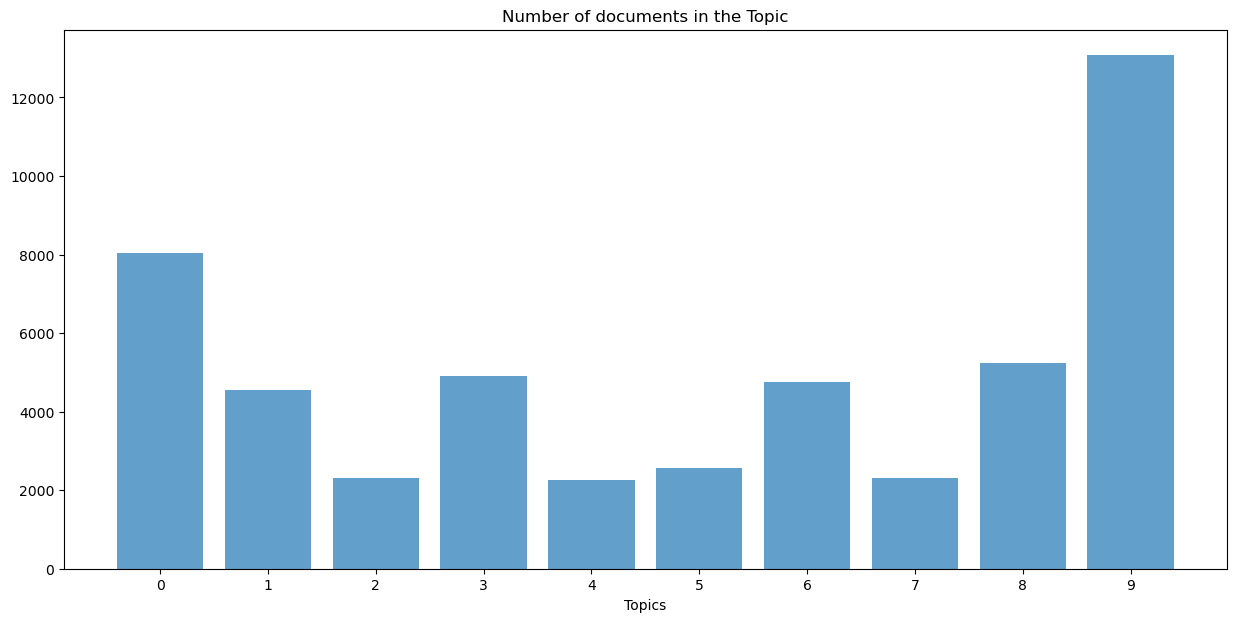

In [57]:
# coding=utf-8
from matplotlib import pyplot as plt
from matplotlib import font_manager
 
plt.figure(figsize=(15,7)) 
plt.bar(range(10),topic_num_list,align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(range(10),range(10))
plt.xlabel("Topics")
plt.title('Number of documents in the Topic')
plt.show()